<a href="https://colab.research.google.com/github/Mohamm76/Arabic-Handwritten-Digits-Recognition-KSA/blob/main/notebook/Arabic_MNIST_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ربط الملف بجوجل درايف

In [21]:
# 1. ربط Google Drive للوصول إلى المجلدات التي أنشأتها
from google.colab import drive
drive.mount('/content/drive')

# 2. تحديد المسار الرئيسي للمشروع (تأكد من مطابقة الاسم لما أنشأته في درايف)
import os
os.chdir('/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST')
print("المسار الحالي هو:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
المسار الحالي هو: /content/drive/MyDrive/AI_Portfolio/Arabic_MNIST


# جلب البيانات وتخزينها
سنقوم الآن بتحميل مجموعة بيانات MADBase (الأرقام العربية) مباشرة إلى مجلد data في الدرايف الخاص بي لتجنب تكرار التحميل لاحقاً.

In [22]:
# تحميل البيانات بصيغة CSV (الأسهل للمبتدئين) مباشرة إلى مجلد data
# سنستخدم نسخة GitHub الموثقة للبيانات لضمان سرعة التحميل
!wget -P data/ https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip

# فك الضغط داخل مجلد data
import zipfile
with zipfile.ZipFile('data/Arabic Handwritten Digits Dataset CSV.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

print("تم تحميل البيانات وفك الضغط بنجاح في مجلد data")

--2026-01-29 08:16:13--  https://raw.githubusercontent.com/mloey/Arabic-Handwritten-Digits-Dataset/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13911478 (13M) [application/zip]
Saving to: ‘data/Arabic Handwritten Digits Dataset CSV.zip.2’

Arabic Handwritten  100%[===================>]  13.27M  66.2MB/s    in 0.2s    

2026-01-29 08:16:14 (66.2 MB/s) - ‘data/Arabic Handwritten Digits Dataset CSV.zip.2’ saved [13911478/13911478]

تم تحميل البيانات وفك الضغط بنجاح في مجلد data


# تحميل البيانات ومعاينتها

شكل مصفوفة التدريب: (60000, 784)
شكل مصفوفة التسميات: (60000, 1)


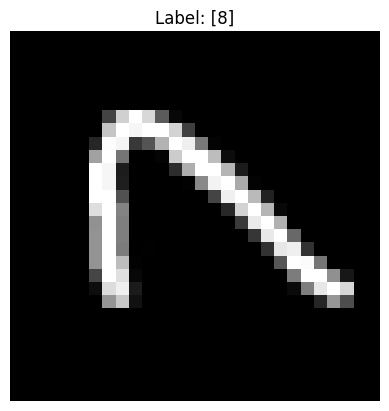

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. تحميل ملفات الـ CSV (الصور والتسميات)
# نستخدم pandas لقراءة البيانات؛ الصور هي عبارة عن صفوف من 784 بكسل (28x28)
X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)

# 2. معاينة شكل البيانات
print(f"شكل مصفوفة التدريب: {X_train.shape}") # المتوقع (60000, 784)
print(f"شكل مصفوفة التسميات: {y_train.shape}") # المتوقع (60000, 1)

# 3. عرض عينة من الصور للتأكد من جودتها
# سنقوم بتحويل الصف الأول إلى مصفوفة 28x28 لعرضها
sample_image = X_train.iloc[8].values.reshape(28, 28)
plt.imshow(sample_image.T, cmap='gray') # نستخدم.T لأن الصور في MADBase قد تحتاج لتدوير
plt.title(f"Label: {y_train.iloc[8].values}")
plt.axis('off')
plt.show()

# هندسة البيانات وتجهيزها للتدريب

### التحجيم (Normalization) وتجهيز التسميات

In [29]:
import os
import pandas as pd
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split

# 1. إعداد المسار الصحيح الذي أكدته
project_path = '/content/drive/MyDrive/AI_Portfolio/Arabic_MNIST'
os.chdir(project_path)

# 2. فك ضغط الملف الموجود لاستخراج كافة الملفات (بما فيها ملفات الاختبار)
# نستخدم الكود البرمجي لفك الضغط لضمان التعامل الصحيح مع الأسماء التي تحتوي على مسافات
zip_path = 'data/Arabic Handwritten Digits Dataset CSV.zip.1'
if os.path.exists(zip_path):
    print("جاري فك ضغط البيانات لاستخراج ملفات الاختبار...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('data/')
    print("تم فك الضغط بنجاح.")
else:
    # في حال لم يجد الملف، سنقوم بتحميل الملف المضغوط كاملاً من رابط بديل موثوق
    print("الملف المضغوط غير موجود، جاري تحميله من جديد...")
    !wget -P data/ "https://github.com/mloey/Arabic-Handwritten-Digits-Dataset/raw/master/Arabic%20Handwritten%20Digits%20Dataset%20CSV.zip"
    with zipfile.ZipFile('data/Arabic Handwritten Digits Dataset CSV.zip', 'r') as zip_ref:
        zip_ref.extractall('data/')

# 3. قراءة البيانات (الآن كافة الملفات أصبحت موجودة في مجلد data)
print("جاري قراءة ملفات التدريب والاختبار...")
try:
    X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
    y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)
    X_test = pd.read_csv('data/csvTestImages.csv', header=None)
    y_test = pd.read_csv('data/csvTestLabel 10k x 1.csv', header=None)
    print("تمت قراءة جميع الملفات بنجاح!")
except FileNotFoundError as e:
    print(f"خطأ: لا يزال هناك ملف مفقود. تفاصيل: {e}")

# 4. المعالجة المسبقة (Normalization)
X_train_norm = X_train.values / 255.0
X_test_norm = X_test.values / 255.0
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# 5. التقسيم النهائي
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_norm, y_train_flat, test_size=0.2, random_state=42
)

print("-" * 30)
print(f"تمت المعالجة بنجاح!")
print(f"حجم التدريب: {X_train_split.shape}, حجم التحقق: {X_val_split.shape}, حجم الاختبار: {X_test_norm.shape}")

جاري فك ضغط البيانات لاستخراج ملفات الاختبار...
تم فك الضغط بنجاح.
جاري قراءة ملفات التدريب والاختبار...
تمت قراءة جميع الملفات بنجاح!
------------------------------
تمت المعالجة بنجاح!
حجم التدريب: (48000, 784), حجم التحقق: (12000, 784), حجم الاختبار: (10000, 784)
